# **Task 4 - Modelling**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.credit_scoring_model import *
from scripts.credit_scoring_model import *

# Load the data

In [3]:
data = pd.read_csv('../data/woe_transformed_data.csv')

In [4]:
data.head()

,CurrencyCode,TransactionMonth,TransactionYear,SubscriptionId,AverageTransactionAmount,StdDevTransactionAmount,ChannelId,Amount,CustomerId,TransactionCount,...,label,RFMS_Score,CountryCode,TransactionStartTime,AccountId,FraudResult,Frequency_woe,MonetaryTotal_woe,MonetaryAvg_woe,Recency_woe
0,UGX,0.848684,-0.994246,SubscriptionId_4836,-0.195113,-0.135444,ChannelId_2,-0.135580,CustomerId_1,-0.446132,...,0,0.184808,0.0,2018-11-21 16:49:14+00:00,AccountId_1074,-0.044962,-1.371767,-0.750706,-0.534596,-6.499419
1,UGX,0.848684,-0.994246,SubscriptionId_4836,-0.195113,-0.135444,ChannelId_2,-0.135580,CustomerId_10,-0.446132,...,0,0.184808,0.0,2018-11-21 16:49:09+00:00,AccountId_1074,-0.044962,-1.371767,-0.750706,-0.534596,-6.499419
2,UGX,0.848684,-0.994246,SubscriptionId_4753,-0.031720,-0.127996,ChannelId_3,0.026618,CustomerId_1001,-0.441579,...,0,0.168777,0.0,2018-11-16 07:53:19+00:00,AccountId_661,-0.044962,-0.344219,-0.750706,0.467798,-6.499419
3,UGX,0.848684,-0.994246,SubscriptionId_2325,-0.073921,-0.195419,ChannelId_3,-0.042316,CustomerId_1002,-0.434750,...,0,0.346756,0.0,2018-11-15 18:50:09+00:00,AccountId_662,-0.044962,-0.344219,0.761040,-0.534596,-4.272146
4,UGX,-0.874040,1.005787,SubscriptionId_3559,-0.039500,-0.133936,ChannelId_3,0.026618,CustomerId_1003,-0.440441,...,0,0.385479,0.0,2019-02-01 14:58:07+00:00,AccountId_663,-0.044962,-0.344219,-0.750706,0.467798,-2.618354


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CurrencyCode              3742 non-null   object 
 1   TransactionMonth          3742 non-null   float64
 2   TransactionYear           3742 non-null   float64
 3   SubscriptionId            3742 non-null   object 
 4   AverageTransactionAmount  3742 non-null   float64
 5   StdDevTransactionAmount   3742 non-null   float64
 6   ChannelId                 3742 non-null   object 
 7   Amount                    3742 non-null   float64
 8   CustomerId                3742 non-null   object 
 9   TransactionCount          3742 non-null   float64
 10  BatchId                   3742 non-null   object 
 11  PricingStrategy           3742 non-null   float64
 12  ProductId                 3742 non-null   object 
 13  TransactionHour           3742 non-null   float64
 14  Transact

In [6]:
columns_to_drop=['TransactionId','ProductId','BatchId','AccountId', '','CustomerId','SubscriptionId','TransactionStartTime','CurrencyCode',
    'ProviderId','CountryCode', 'RFMS_Score']
data=data.drop(columns_to_drop, axis=1, errors='ignore')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionMonth          3742 non-null   float64
 1   TransactionYear           3742 non-null   float64
 2   AverageTransactionAmount  3742 non-null   float64
 3   StdDevTransactionAmount   3742 non-null   float64
 4   ChannelId                 3742 non-null   object 
 5   Amount                    3742 non-null   float64
 6   TransactionCount          3742 non-null   float64
 7   PricingStrategy           3742 non-null   float64
 8   TransactionHour           3742 non-null   float64
 9   ProductCategory           3742 non-null   object 
 10  Value                     3742 non-null   float64
 11  TransactionDay            3742 non-null   float64
 12  TotalTransactionAmount    3742 non-null   float64
 13  label                     3742 non-null   int64  
 14  FraudRes

# **1.** Model Selection and Training

In [8]:
# Encode Categorical Features
categorical_columns = ['ProductCategory','ChannelId']
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [9]:
# Separate features and target variable
X = data.drop('label', axis=1)  
y = data['label']  # label

In [10]:
# features
print(X.columns)

Index(['TransactionMonth', 'TransactionYear', 'AverageTransactionAmount',
       'StdDevTransactionAmount', 'ChannelId', 'Amount', 'TransactionCount',
       'PricingStrategy', 'TransactionHour', 'ProductCategory', 'Value',
       'TransactionDay', 'TotalTransactionAmount', 'FraudResult',
       'Frequency_woe', 'MonetaryTotal_woe', 'MonetaryAvg_woe', 'Recency_woe'],
      dtype='object')


In [11]:
X.head()

,TransactionMonth,TransactionYear,AverageTransactionAmount,StdDevTransactionAmount,ChannelId,Amount,TransactionCount,PricingStrategy,TransactionHour,ProductCategory,Value,TransactionDay,TotalTransactionAmount,FraudResult,Frequency_woe,MonetaryTotal_woe,MonetaryAvg_woe,Recency_woe
0,0.848684,-0.994246,-0.195113,-0.135444,1,-0.135580,-0.446132,2.379557,0.732891,0,0.000807,0.568697,0.164618,-0.044962,-1.371767,-0.750706,-0.534596,-6.499419
1,0.848684,-0.994246,-0.195113,-0.135444,1,-0.135580,-0.446132,2.379557,0.732891,0,0.000807,0.568697,0.164618,-0.044962,-1.371767,-0.750706,-0.534596,-6.499419
2,0.848684,-0.994246,-0.031720,-0.127996,2,0.026618,-0.441579,-0.349252,-1.123951,2,0.000807,0.010834,0.165994,-0.044962,-0.344219,-0.750706,0.467798,-6.499419
3,0.848684,-0.994246,-0.073921,-0.195419,2,-0.042316,-0.434750,2.379557,1.145522,0,-0.068230,-0.100739,0.165270,-0.044962,-0.344219,0.761040,-0.534596,-4.272146
4,-0.874040,1.005787,-0.039500,-0.133936,2,0.026618,-0.440441,-0.349252,0.320259,2,0.000807,-1.662755,0.165994,-0.044962,-0.344219,-0.750706,0.467798,-2.618354


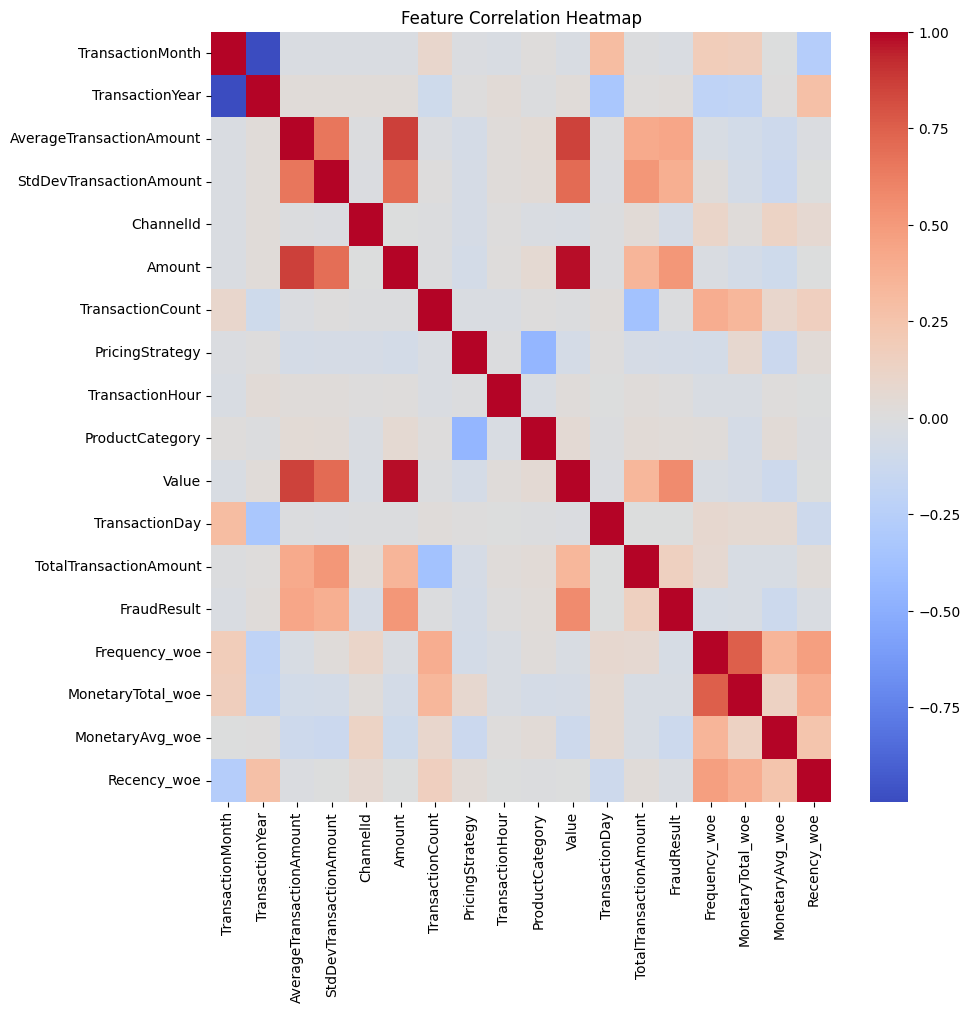

Highly correlated feature pairs:
TransactionMonth - TransactionYear: -1.00
AverageTransactionAmount - Amount: 0.87
AverageTransactionAmount - Value: 0.85
Amount - Value: 0.98


In [12]:
# Analyze feature correlations
analyze_feature_correlations(X)

# **a.** Split the Data

In [13]:
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

In [14]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [15]:
# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [16]:
# size of the train and test splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 4252 samples
Testing set size: 749 samples


# **b.** Models

In [17]:
# Create models
logistic_model, dt_model, rf_model, gb_model = create_models()

# Logistic Regression Model

In [18]:
# Train Logistic Regression model
logistic_model = train_model(logistic_model, X_train, y_train)

Logistic Regression Performance:
Accuracy: 0.9840
Precision: 0.9556
Recall: 0.9908
F1: 0.9729


/home/neba/Desktop/Data_Engineering/KAMI/Week-6/bati-bank-credit-scoring/.env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


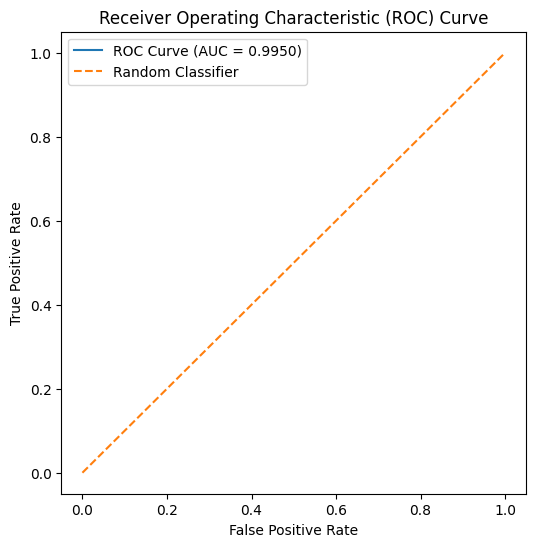

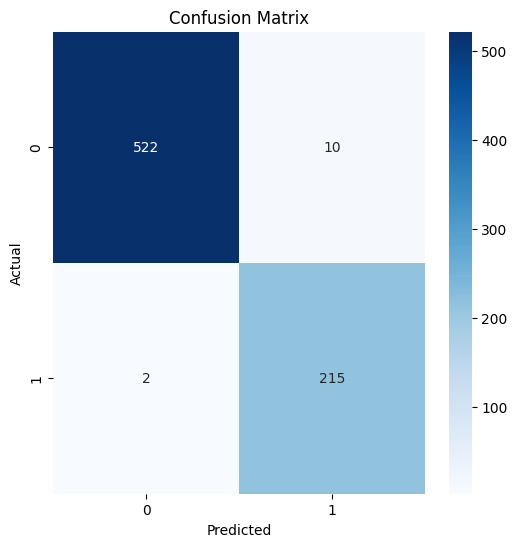

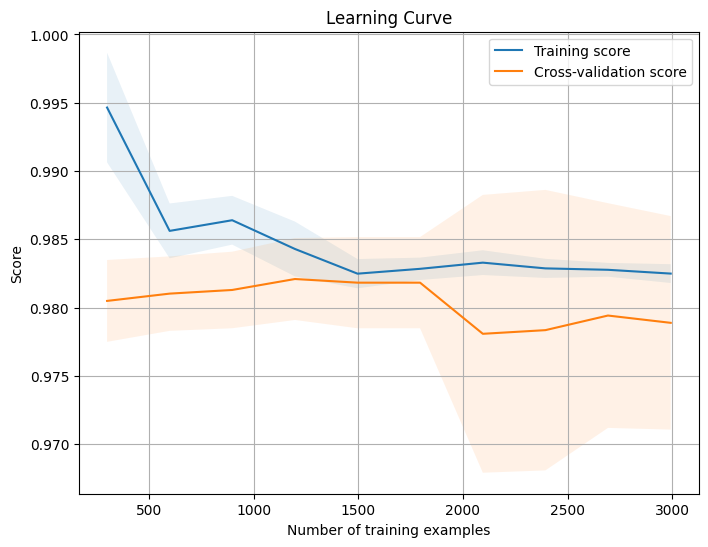

In [23]:
# evaluate Logistic Regression models
print("Logistic Regression Performance:")
logistic_metrics = evaluate_model(logistic_model, X_test, y_test)
for metric, value in logistic_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_roc_curve(logistic_model, X_test, y_test)
plot_confusion_matrix(logistic_model, X_test, y_test)
plot_learning_curve(logistic_model, X, y)

# Decision Tree Model

In [ ]:
# Train Decision Tree model
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_dt_model = tune_model(dt_model, X_train, y_train, dt_param_grid)


Decision Tree Performance:
Accuracy: 0.9880
Precision: 0.9727
Recall: 0.9862
F1: 0.9794


/home/neba/Desktop/Data_Engineering/KAMI/Week-6/bati-bank-credit-scoring/.env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


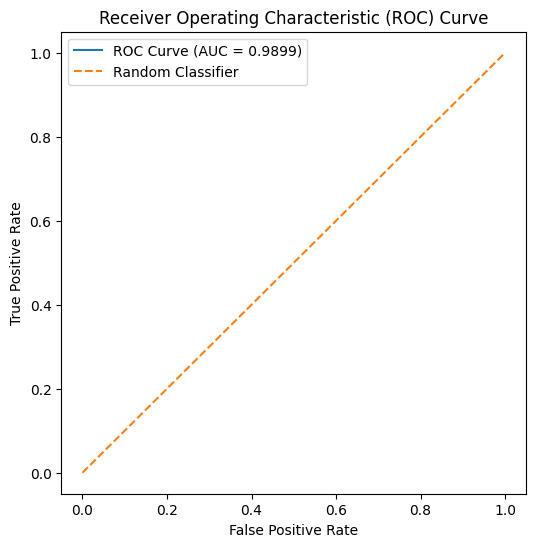

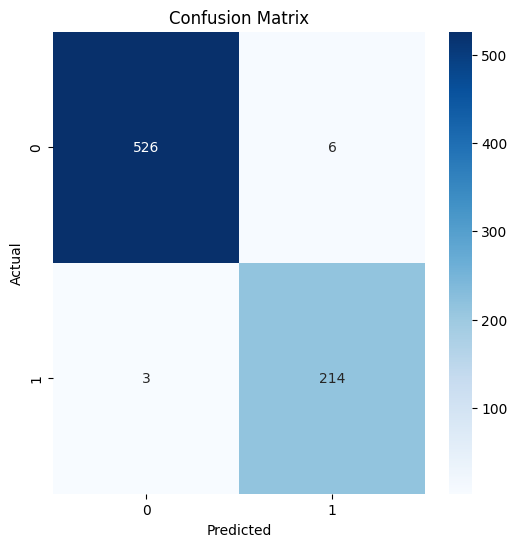

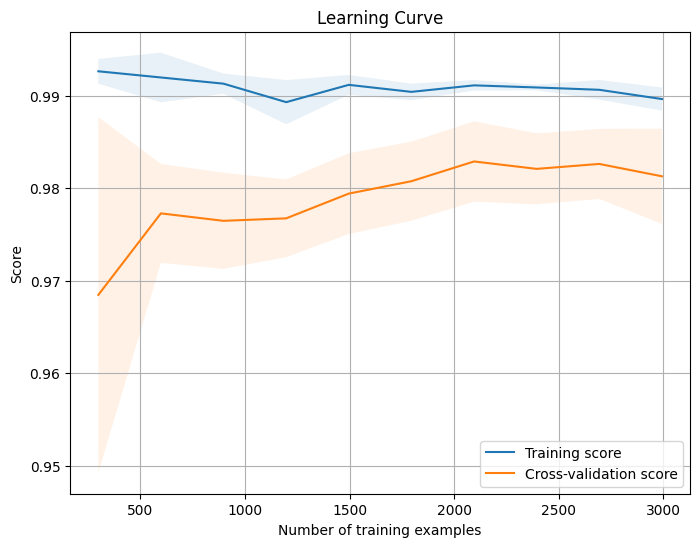

<Figure size 1000x600 with 0 Axes>

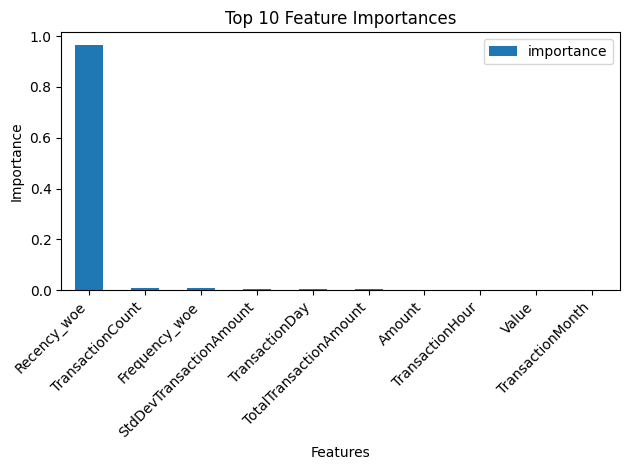

In [26]:
# evaluate Decision Tree model
print("\nDecision Tree Performance:")
dt_metrics = evaluate_model(best_dt_model, X_test, y_test)
for metric, value in dt_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_roc_curve(best_dt_model, X_test, y_test)
plot_confusion_matrix(best_dt_model, X_test, y_test)
plot_learning_curve(best_dt_model, X, y)
plot_feature_importance(best_dt_model, X)

# Random Forest Model

In [27]:
# Train Random Forest model
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_rf_model = tune_model(rf_model, X_train, y_train, rf_param_grid)


Random Forest Performance:
Accuracy: 0.9880
Precision: 0.9727
Recall: 0.9862
F1: 0.9794


/home/neba/Desktop/Data_Engineering/KAMI/Week-6/bati-bank-credit-scoring/.env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


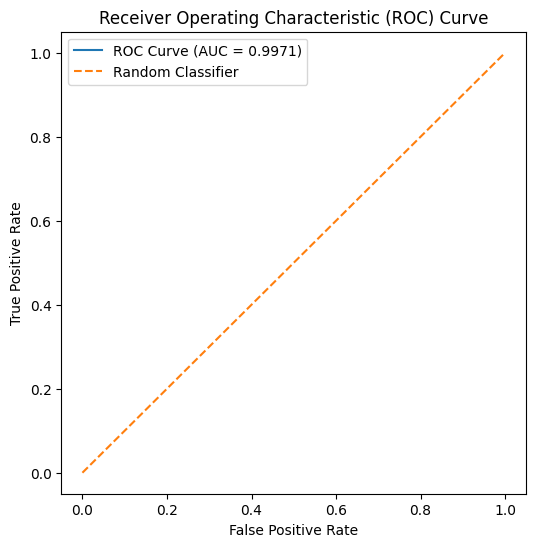

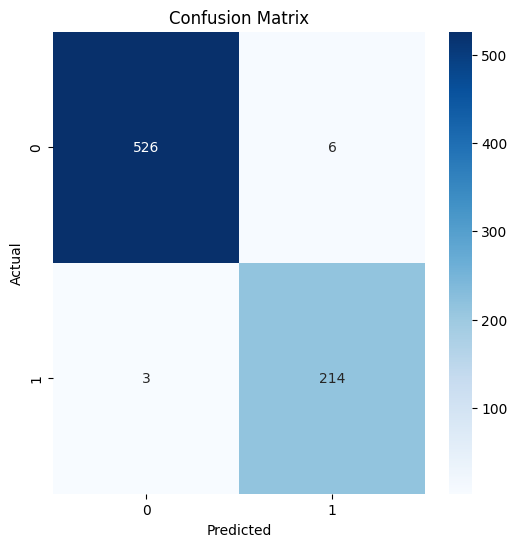

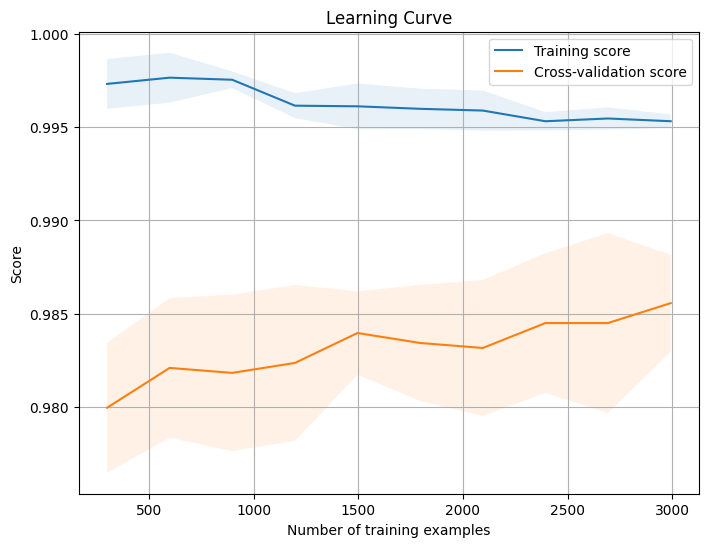

<Figure size 1000x600 with 0 Axes>

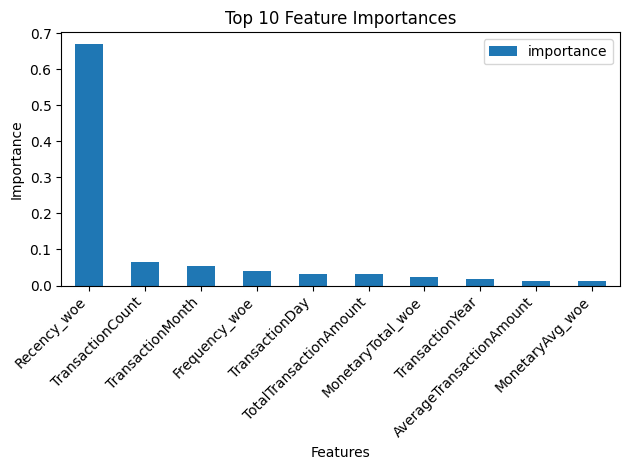

In [28]:

# evaluate Random Forest model
print("\nRandom Forest Performance:")
rf_metrics = evaluate_model(best_rf_model, X_test, y_test)
for metric, value in rf_metrics.items():
    print(f"{metric.capitalize()}: {value:.4f}")

plot_roc_curve(best_rf_model, X_test, y_test)
plot_confusion_matrix(best_rf_model, X_test, y_test)
plot_learning_curve(best_rf_model, X, y)
plot_feature_importance(best_rf_model, X)